In [19]:
from PIL import Image

img = Image.open("pepethink.png")

#아래에 명시한 위치들을 기반으로 짤려서 나오게 디ㅗㄴ다.
# (0,0이 좌측 상단임을 기억하도록하자
crop_img.show()

NameError: name 'crop_img' is not defined

In [15]:
from PIL import Image


#image에는 color space라는 공간이 있는데 이 공간에서 color값들을 뺴고 조도로만
#이미지를 재구성하면 GrayScale이 된다.
#조도로만 재구성하면 좋은 것이 컴퓨터가 색상에 민감하게 반응하지 않게 된다

img = Image.open("pepethink.png")
grayscale = img.convert("L")
grayscale.show()

In [ ]:
from PIL import Image


img = Image.open(pepethink.png")
#이미지를 resize할때는 반드시 아래와 같이 타입을 튜플형태로 넣어줘야한다.
resized_img = img.resize((200,400))
resized_img.show()

In [52]:
from PIL import Image
from PIL import ImageEnhance
img = Image.open("pepethink.png")
#IMAGEENHANCE로 밝기를 조절해서
#사진상에 나와있는 잡티등을 없어주게 만들 수 있다.
enhanced_img = ImageEnhance.Brightness(img)
#enhance 부분에서 숫자가 높을수록 강렬하게 빛을 밝혀 잡티를 없애준다
#그러므로 위의 crop과함께 서써서 부분적으로 없애자
enhanced_img.enhance(3).show()

In [22]:
from PIL import Image
from PIL import ImageEnhance

img = Image.open("pepethink.png")
#반시계방향으로 회전시킨다
#인자는 radian 표현이아닌 degreee(각도) 표현을 사용한다.
rotated_img = img.rotate(90)
rotated_img.show()

In [24]:
from PIL import Image
from PIL import ImageEnhance

img = Image.open("pepethink.png")

#Contrast는 말 그대로 이미지의 대조분을 강화시킴
contrasted_img = ImageEnhance.Contrast(img)
#강화 수치는 enhance에 1,2,3, 등등으로 조정가능
#숲자 높을수록 대조 높아짐
contrasted_img.enhance(3).show()

In [4]:
from skimage import io

#이미지 읽어오기(형태는 행렬형태임)
img =io.imread("dog2.jpg")
#이름을 new_cat.jpg로 저장하는 작업
io.imsave('new_dog2.jpg',img)
#그리고 다시 불러와서 저장이 잘 되었는지 확인한다.
img= io.imread('dog2.jpg')
io.show()

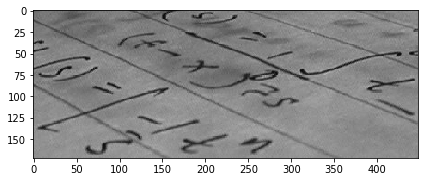

In [37]:
from skimage import data, io
#글자인식OCR 에 활용하는 예제중 하나
io.imshow(data.text())
io.show()

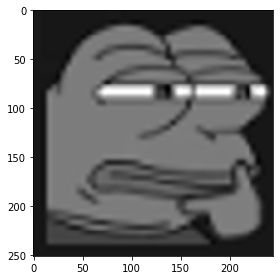

In [39]:
from skimage import color, io
img= io.imread('pepethink.png')
# 위의 Pilow에서 사용한 convert("L") 과 동일하다.
gray =color.rgb2gray(img)
io.imshow(gray)
io.show()

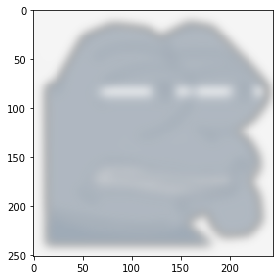

In [44]:
from skimage import io
from skimage import filters

img = io.imread('pepethink.png')
#가우시안 통계함수가 라플라시안 적분을 기반으로 산출된다.
#그래서 sigma값이 별도로 존재하는데
#이 값이 높으면 높을수록 분산이 커지기떄문에  숫자가 크면모자이크가 강화된다.
out = filters.gaussian(img,sigma= 5)
io.imshow(out)
io.show()

In [65]:
from skimage import io
from skimage.morphology import disk
from skimage import color
from skimage import filters

img = io.imread('dog.jpg')
img = color.rgb2gray(img)
out = filters.median(img,disk(7))
io.imshow(out)
io.show()

ValueError: Could not find a format to read the specified file in mode 'i'

In [58]:
from PIL import Image
from PIL import ImageFilter

img = Image.open('pepethink.png')
# grayscale 작업을해서 영상 잡음을 최소화시킴
img = img.convert('L')
# 전용 필터를 만들기 위한 커스텀 연산 커널을 만들었다.
new_img = img.filter(
    ImageFilter.Kernel(
        # 3 by 3행렬의 연산 커널이며
        # 연산 대상은 [1,2,3]
        #             [4,5,6]
        #             [7,8,9]
        # 위의 행렬이 이미지 행렬과 Convolution 연산을 수행하게 된다
        # 그러면 결국 미분이 진행된다.
        # 첫번쨰 인자는 행렬의 차원
        # 두번쨰 인자는 해당 행렬에 배치된 값들
    (3,3), [1,2,3,4,5,6,7,8,9]
    )
)
new_img.show()

In [67]:
from PIL import Image
from PIL import ImageFilter

img = Image.open('dog2.jpg')
img = img.convert('L')
new_img = img.filter(
    ImageFilter.Kernel(
        # 소벨 필터를 살짝 가공한 연산 커널임
        # 소벨 필터를 공부하기전에
        #공업 수학과 벡터의 미분인 편도함수를 공부해야함
        (3,3), [1,0,-1,5,0,-5,1,0,1]
    )
)
# 필터 이론에 대해 조금만 설명하자면
#철수가 A지점에 있다.
# 철수는 B지점을 가려고 한다.
# A에서 B 사이의 거리는 10m이고
# 철수가 A에서 B를 갔다가 돌아오는데 100분이 걸렸다.
# 철수의 이동 속도는?
# 20ㅡM , 100분 S =vt -> 20 / 100분 = 속도
# 여기서 봤던 이 속도라는 개념이 순수한 속도? 평균 속도 개념인가?
#평균속도
# 결국 컴퓨터가 limit x -> 0 을 표현할수 없기 때문에
#즉 단순히 삼각형의 기울기 구하기 문제가 된다는 것이다.
new_img.show()

img= [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
thresh_img= [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


Text(0.5, 1.0, 'Adaptive Thresholding')

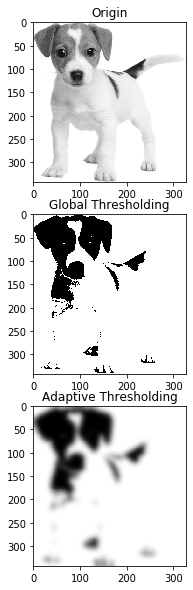

In [5]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu, threshold_local
from skimage.io import imread
from skimage.color import rgb2gray
img = imread('dog2.jpg')
img = rgb2gray(img)
#threshold(임계치)를 잡아오는 함수(threshold_otsu)
thresh_value = threshold_otsu(img)
#지정한 임계치보다 작은 값을 흰색이나 검정색으로 배치할려는 것
thresh_img = img > thresh_value
print("img=", img)
print("thresh_img=", thresh_img)
#영역을 지정해서 반복적으로 패턴을 검색
#적정 블록크기 35와 offset 이동값 10을 가지고
#반복적으로 thresholding 작업을 진행함
block_size = 35
adaptive_img = threshold_local(thresh_img, block_size, offset = 10)

#행이 3개다- 즉 그림을 3행으로 배치하기 위함
fig, axes = plt.subplots(nrows = 3, figsize = (20, 10))
#각각의 그래프 축들이 생기는데
#첫번째 그림, 두번째 그림, 세번째 그림
ax0, ax1, ax2 = axes
#각각의 그림에 자동으로 Grayscale 처리를 해줌
plt.gray()
ax0.imshow(img)
ax0.set_title('Origin')

ax1.imshow(thresh_img)
ax1.set_title('Global Thresholding')
ax2.imshow(adaptive_img)
ax2.set_title('Adaptive Thresholding')

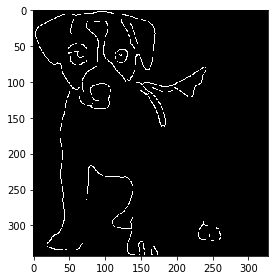

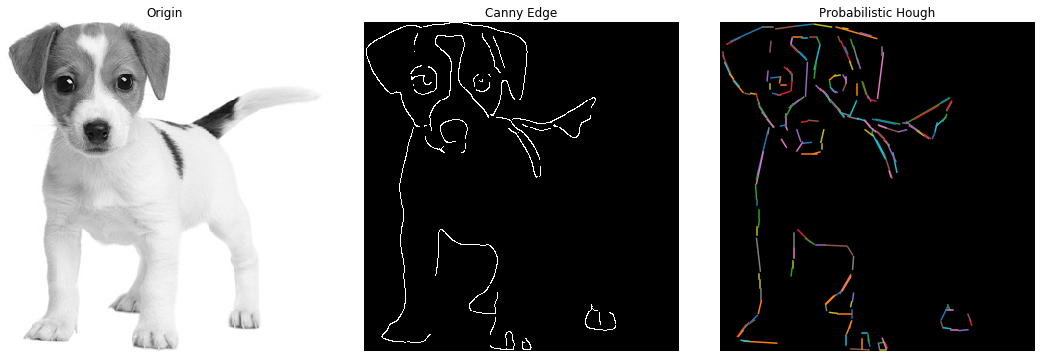

In [8]:
import matplotlib.pyplot as plt
from skimage.transform import(hough_line, probabilistic_hough_line)
from skimage.feature import canny
from skimage import io, color
img = io.imread('dog2.jpg')
img = color.rgb2gray(img)
edges = canny(img, 3)
io.imshow(edges)
io.show()
#허프라인이 있는데
# 내부계산에는 삼각함수가 사용되며 통계적 추론이 같이 적용됨
#threshold는 임계치(threshold_otsu, threshold_local)\
#결국 threshold는 어떤 값을 버릴지 결정하는 수치
#이값은 최소치는 0이고 최대치는 255에 해당
#color 색상 비트가 8비트 - 2^8 = 256개 -0~255
lines = probabilistic_hough_line(
    edges, threshold = 10, line_length = 5, line_gap = 3
)
fig, axes = plt.subplots(
    1, 3, figsize = (15, 5), sharex = True, sharey = True
)
ax = axes.ravel()
ax[0].imshow(img, cmap = plt.cm.gray)
ax[0].set_title('Origin')
ax[1].imshow(edges, cmap = plt.cm.gray)
ax[1].set_title('Canny Edge')
ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot(
        (p0[0], p1[0]), (p0[1], p1[1])
    )
ax[2].set_xlim(0, img.shape[1])
ax[2].set_ylim(img.shape[0], 0)
ax[2].set_title('Probabilistic Hough')
for a in ax:
    a.set_axis_off()
plt.tight_layout()
plt.show()

C:\Users\user\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


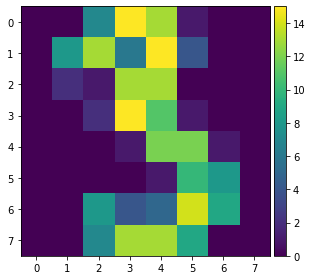

Performance Report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       131
           1       0.97      0.96      0.96       137
           2       1.00      1.00      1.00       131
           3       0.98      0.92      0.95       136
           4       0.99      0.97      0.98       139
           5       0.96      0.99      0.98       136
           6       0.99      0.99      0.99       138
           7       0.97      0.99      0.98       134
           8       0.95      0.97      0.96       130
           9       0.94      0.98      0.96       136

    accuracy                           0.97      1348
   macro avg       0.98      0.97      0.97      1348
weighted avg       0.98      0.97      0.97      1348




C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [10]:
from sklearn import datasets, metrics
from sklearn.linear_model import LogisticRegression
mnist = datasets.load_digits()
imgs = mnist.images
data_size = len(imgs)
io.imshow(imgs[3])
io.show()
# Image 전처리
imgs = imgs.reshape(len(imgs), -1)
labels = mnist.target
# 로지스틱 회귀 분석 준비
LR_classifier = LogisticRegression(
    C = 0.01, penalty = 'l2', tol = 0.01
)
# 3/4 는 학습에 활용, 1/4은 평가용으로 활용
LR_classifier.fit(
    imgs[:int((data_size / 4) * 3)],
    labels[:int((data_size / 4) * 3)]
)
# 평가 진행
predictions = LR_classifier.predict((imgs[int((data_size / 4)):]))
target = labels[int((data_size / 4)):]
# 성능 측정
print("Performance Report: \n%s\n" %
     (metrics.classification_report(target, predictions))
)

[7]


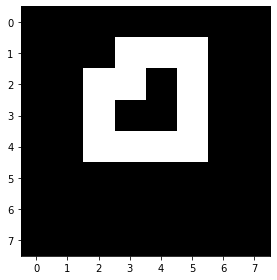

In [3]:
from sklearn import datasets, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from skimage import io, color, feature, transform
mnist = datasets.load_digits()
imgs = mnist.images
data_size = len(imgs)
# Image 전처리
imgs = imgs.reshape(len(imgs), -1)
labels = mnist.target
# 로지스틱 회귀 분석 준비
LR_classifier = LogisticRegression(
    C = 0.01, penalty = 'l2', tol = 0.01, max_iter = 1000000000
)
# 3/4 는 학습에 활용, 1/4은 평가용으로 활용
LR_classifier.fit(
    imgs[:int((data_size / 4) * 3)],
    labels[:int((data_size / 4) * 3)]
)
# 사용자가 지정한 이미지를 넣어서
# 실제로 이미지의 숫자를 판별하는지 검사해보도록 한다.
digit_img = io.imread('digit.jpg')
digit_img = color.rgb2gray(digit_img)
# MNIST 사용시 주의할점: 이미지 크기를 28 x 28 보다 작게 맞춰야함
digit_img = transform.resize(digit_img, (8, 8), mode="wrap")
digit_edge = feature.canny(digit_img, sigma = 1)
io.imshow(digit_edge)
# 딥러닝 하는 프로세스 마지막에 무조건 한번 flatten()을 해줘야 한다.
digit_edge = [digit_edge.flatten()]
# 평가 진행
predictions = LR_classifier.predict(digit_edge)
print(predictions)

In [ ]:
import cv2 
from matplotlib import pyplot as plt
img = cv2.imread('dog2.jpg')
plt.imshow(cv2.img)

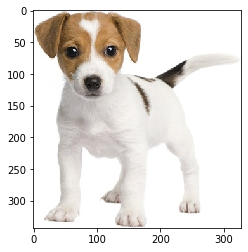

In [5]:
import cv2 
from matplotlib import pyplot as plt
img = cv2.imread('dog2.jpg')
# cv2.cvtColor는 ConvertCololr 의 약자
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

180.0


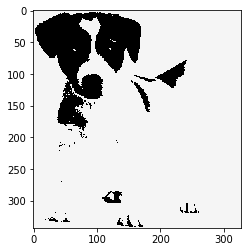

In [20]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('dog2.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, new_img = cv2.threshold(gray_img, 180, 245, cv2.THRESH_BINARY)
print(ret)
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.show()

In [23]:
import cv2
# 노트북웹캠으로 해보기
cam = cv2.VideoCapture(0)
while(cam.isOpened()):
    ret, frame = cam.read()
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & OxFF == ord('q'):
        break
cam.release()
cv2.destroyAllWindows()

In [1]:
import cv2
fps=30
title ='normal speed video'
delay = int(1000/fps)

cam=cv2.VideoCapture("challenge.mp4")
while(cam.isOpened()):
    ret, frame = cam.read()
    if ret!= True:
        break
    cv2.imshow('frame', frame)
    if cv2.waitKey(delay) & 0xFF  == ord('q'):
        break


In [2]:
import cv2
import numpy as np
# Region of Interest(관심 영역)
# 첫번째 인자는 영상 프레임
# 두번째 관심 영역에 해당하는 정점(좌표)
def roi(img, vertices):
    mask = np.zeros_like(img)
    if len(img.shape) > 2:
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    print(mask)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img
fps = 30
title = 'normal speed video'
delay = int(1000 / fps)
cam = cv2.VideoCapture("challenge.mp4")
while(cam.isOpened()):
    ret, frame = cam.read()
    if ret != True:
        break
    # 영상 프레임을 가져오면
    # 해당 영상의 높이값과 폭을 얻을 수 있다.
    height = frame.shape[0]
    width = frame.shape[1]
    # 우리가 관심을 가지려고 하는 영역을 지정(삼각형)
    region_of_interest_vertices = [
        (0, height),
        (width / 2, height / 2),
        (width, height)
    ]
    # 여기에 추가적으로 영상내에 적용할 함수들을 작성하면 된다.
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY);
    # Canny 까지 넣어주면 실시간 처리 관점에서
    # 벌써 살짝 지연되는 것이 느껴진다
    # 그만큼 영상 처리라는 것이 굉장히 무거운 작업이다.
    # 그래서 무조건 적으로 해당 작업들은
    # 멀티 프로세스, 스레드 기반으로 동작시켜야 한다.
    edges = cv2.Canny(gray, 235, 243, 3)
    # 관심 영역을 제외한 영상의 나머지 부분을 잘라버린다.
    cropped_img = roi(
        edges,
        np.array(
            [region_of_interest_vertices], np.int32
        )
    )
    cv2.imshow('frame', cropped_img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cam.release()
cv2.destroyAllWindows()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 

 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
